In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
### Load the .npz data and convert to tensors ###

npz_data = np.load('data/audiobooks_data_split_smote.npz')

X_train = tf.convert_to_tensor(npz_data['X_train'], dtype=tf.float64)
X_val = tf.convert_to_tensor(npz_data['X_val'], dtype=tf.float64)
X_test = tf.convert_to_tensor(npz_data['X_test'], dtype=tf.float64)
y_train = tf.convert_to_tensor(npz_data['y_train'], dtype=tf.int8)
y_val = tf.convert_to_tensor(npz_data['y_val'], dtype=tf.int8)
y_test = tf.convert_to_tensor(npz_data['y_test'], dtype=tf.int8)

print(f'{X_train.shape=}, {X_val.shape=}, {X_test.shape=}')
print(f'{y_train.shape=}, {y_val.shape=}, {y_test.shape=}')

X_train.shape=TensorShape([18954, 10]), X_val.shape=TensorShape([2370, 10]), X_test.shape=TensorShape([2370, 10])
y_train.shape=TensorShape([18954]), y_val.shape=TensorShape([2370]), y_test.shape=TensorShape([2370])


In [3]:
### Train the baseline model ###

MAX_EPOCHS = 100

input_size = 10
output_size = 2
hidden_layer_size = 64
batch_size = 128
activation='relu'

l2_strength = 0.001
dropout_rate = 0.2

model = tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(shape=(10,)),
        tf.keras.layers.Dense(hidden_layer_size, activation=activation),
        tf.keras.layers.Dense(hidden_layer_size, activation=activation),
        tf.keras.layers.Dense(output_size, activation='softmax')
    ]
)

model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(
            hidden_layer_size, 
            activation=activation, 
            kernel_regularizer=tf.keras.regularizers.l2(l2_strength)
        ),
        tf.keras.layers.Dropout(dropout_rate), 

        tf.keras.layers.Dense(
            hidden_layer_size, 
            activation=activation, 
            kernel_regularizer=tf.keras.regularizers.l2(l2_strength)
        ),
        tf.keras.layers.Dropout(dropout_rate), 

        tf.keras.layers.Dense(
            output_size,
            activation='softmax',
        )
    ]
)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
)

history = model.fit(
    X_train,
    y_train,
    epochs=MAX_EPOCHS,
    batch_size=batch_size,
    validation_data=(X_val, y_val),
    verbose=2,
    callbacks=[early_stopping]
)

Epoch 1/100
149/149 - 2s - 10ms/step - accuracy: 0.7320 - loss: 0.5670 - val_accuracy: 0.7772 - val_loss: 0.4834
Epoch 2/100
149/149 - 0s - 1ms/step - accuracy: 0.7780 - loss: 0.4796 - val_accuracy: 0.7911 - val_loss: 0.4496
Epoch 3/100
149/149 - 0s - 1ms/step - accuracy: 0.7881 - loss: 0.4533 - val_accuracy: 0.7907 - val_loss: 0.4367
Epoch 4/100
149/149 - 0s - 1ms/step - accuracy: 0.7911 - loss: 0.4353 - val_accuracy: 0.7987 - val_loss: 0.4188
Epoch 5/100
149/149 - 0s - 1ms/step - accuracy: 0.7972 - loss: 0.4228 - val_accuracy: 0.8008 - val_loss: 0.4131
Epoch 6/100
149/149 - 0s - 1ms/step - accuracy: 0.8044 - loss: 0.4097 - val_accuracy: 0.8076 - val_loss: 0.3997
Epoch 7/100
149/149 - 0s - 1ms/step - accuracy: 0.8079 - loss: 0.3992 - val_accuracy: 0.8084 - val_loss: 0.3960
Epoch 8/100
149/149 - 0s - 1ms/step - accuracy: 0.8073 - loss: 0.3916 - val_accuracy: 0.8080 - val_loss: 0.3916
Epoch 9/100
149/149 - 0s - 1ms/step - accuracy: 0.8101 - loss: 0.3873 - val_accuracy: 0.8127 - val_loss

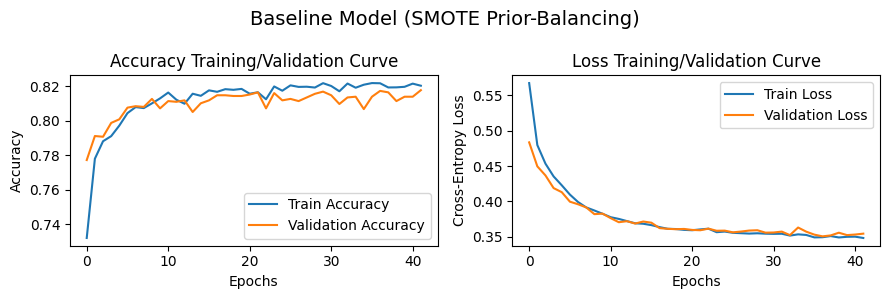

Final Results after 42 epochs:
Accuracy: Train=82.03% | Val=81.77%
Loss: Train=0.3485 | Val=0.3546


In [4]:
### Plot training and validation curves ###

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(9, 3))

# Accuracies plot
axes[0].plot(history.history['accuracy'], label='Train Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Accuracy Training/Validation Curve')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Losses plot
axes[1].plot(history.history['loss'], label='Train Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Loss Training/Validation Curve')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Cross-Entropy Loss')
axes[1].legend()

# Show plots
fig.suptitle('Baseline Model (SMOTE Prior-Balancing)', fontsize=14)
plt.tight_layout()
plt.show()

print(f'Final Results after {len(history.history['accuracy'])} epochs:')
print(f'Accuracy: Train={history.history['accuracy'][-1] * 100:.2f}% | Val={history.history['val_accuracy'][-1] * 100:.2f}%')
print(f'Loss: Train={history.history['loss'][-1]:.4f} | Val={history.history['val_loss'][-1]:.4f}')